In [1]:
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

from PyDemoMomentumopt import MotionPlanner

In [2]:
cfg_file = '../config/SAB_Demos/cfg_quadruped_forward_jump.yaml'

motion_planner = MotionPlanner(cfg_file)
# optimized_kin_plan, optimized_motion_eff, optimized_dyn_plan, planner_setting, time_vector = motion_planner.optimize_motion()

/Users/jviereck/dev/kino-dynamics-opt-sab/src/catkin/motion_planning/momentumopt/src/quadruped/quadruped_wrapper.py:44: DeprecatedWarning: Using deprecated instance variable Model.neutralConfiguration. Please use Model.referenceConfigurations instead.
  self.q = self.robot.model.neutralConfiguration.copy()


('DynOpt', 0)
('Dynopt - ', 15.954348087310791)
('KinOpt', 0)


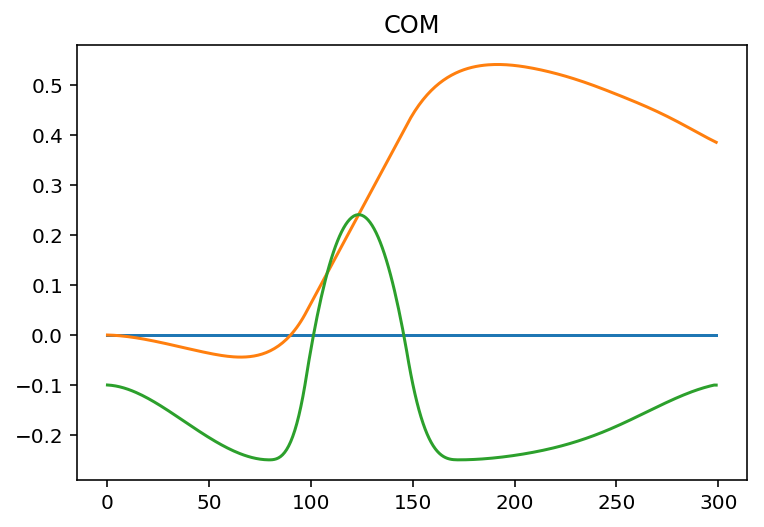

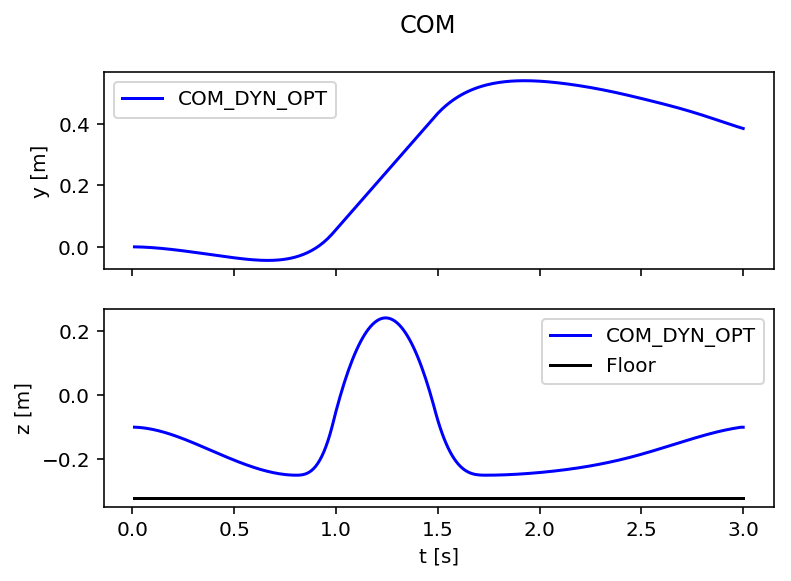

/Users/jviereck/dev/kino-dynamics-opt-sab/src/catkin/motion_planning/momentumopt/src/quadruped/quadruped_wrapper.py:90: DeprecatedWarning: This function signature has been deprecated and will be removed in future releases of Pinocchio. Please change for the new signature of frameJacobian or use computeJointJacobian + updateFramePlacements + getFrameJacobian.
  jac = se3.frameJacobian(self.model, self.data, self.q, index, se3.ReferenceFrame.LOCAL)
/Users/jviereck/dev/kino-dynamics-opt-sab/src/catkin/motion_planning/momentumopt/src/momentumopt/kinoptpy/kinematics_optimizer.py:463: DeprecatedWarning: Call to deprecated function XYZQUATToSe3. Now useless. You can directly have access to this function from the main scope of Pinocchio
  homo = XYZQUATToSe3(xyzq)


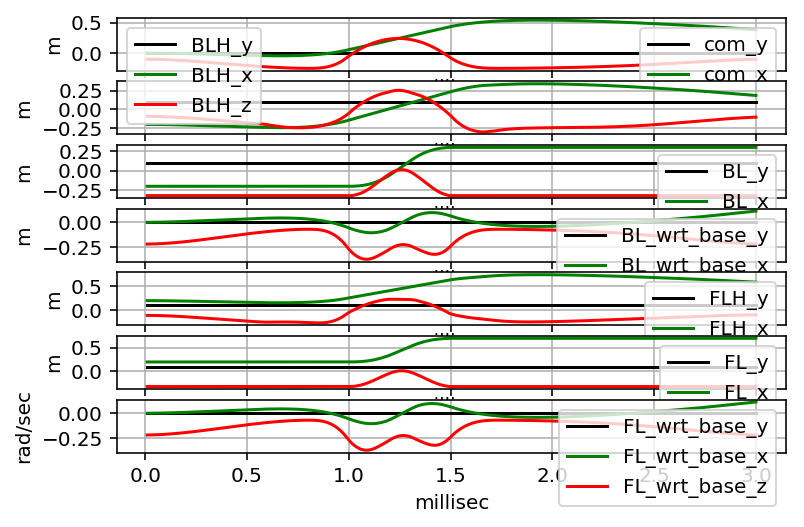

('kinopt - ', 7.965600967407227)


In [3]:
# Dynamic optimization
motion_planner.optimize_dynamics(0)
dynseq = motion_planner.dyn_optimizer.dynamicsSequence()

com = np.array([ds.com for ds in dynseq.dynamics_states])
plt.plot(com[:])
plt.title('COM')

motion_planner.optimize_kinematics(0)

In [4]:
import numpy as np

self = motion_planner.kin_optimizer


des_traj = np.zeros((len(self.robot.effs), len(self.time), 3))

for eff_id, eff in enumerate(self.robot.effs):
    for t in range(len(self.time)):
        self.in_contact[eff_id] = False
        phase = 0
        cnt_ = self.contacts[eff]

        for i in range(len(cnt_)):
            if cnt_[i].start_time() <= self.time[t] < cnt_[i].end_time():
                phase = i
                self.in_contact[eff_id] = True

        if self.in_contact[eff_id]:
            # Set goal position to contact position
            new_goal = self.contacts[eff][phase].position()
        else:
            # Set goal position to minimum jerk trajectory of endeffector
            new_goal = [self.eff_traj_poly[eff][coord].eval(self.time[t]) for coord in range(3)]

        des_traj[eff_id, t] = new_goal

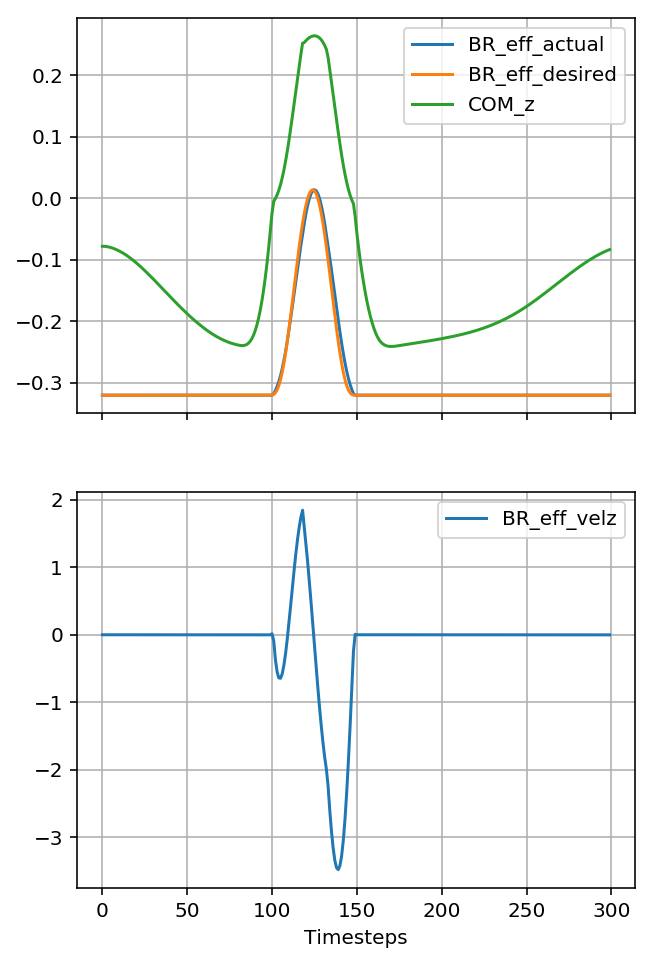

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

axes[0].plot(motion_planner.kin_optimizer.motion_eff["trajectory"][:, 2], label='BR_eff_actual')
axes[0].plot(des_traj[0, :, 2], label='BR_eff_desired')
axes[0].plot(motion_planner.kin_optimizer.motion_eff["COM"][:, 2], label='COM_z')

axes[1].plot(motion_planner.kin_optimizer.motion_eff["velocity"][:, 2], label='BR_eff_velz')
axes[1].set_xlabel('Timesteps')

for ax in axes:
    ax.grid(True)
    ax.legend()

plt.show()

